In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df['SeniorCitizen']=df['SeniorCitizen'].map({0:'No',1:'Yes'})

In [9]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [10]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())

In [11]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [12]:
df.drop('customerID',axis=1,inplace=True)

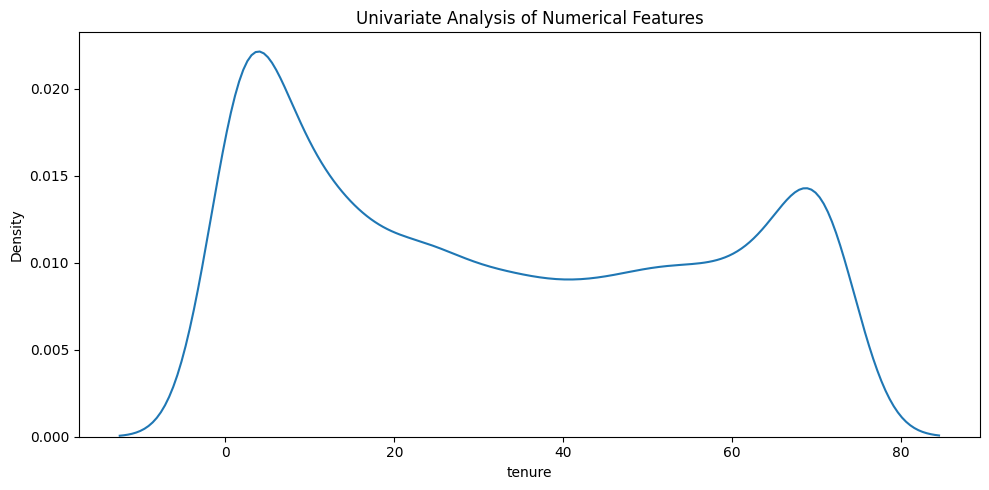

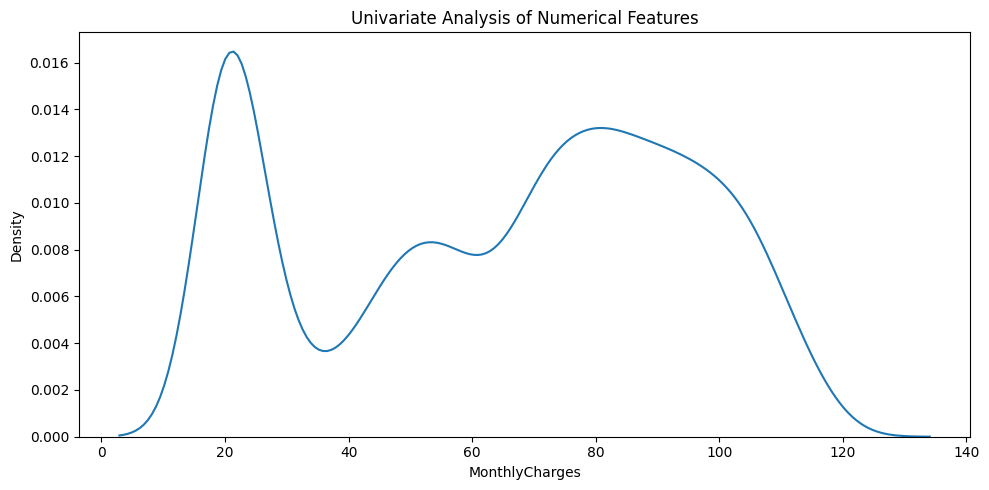

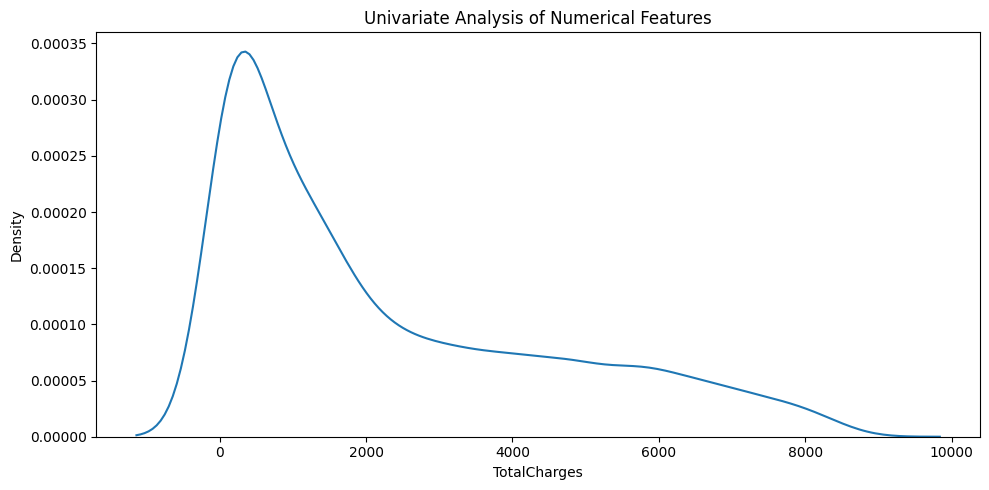

In [13]:
num_features=['tenure','MonthlyCharges','TotalCharges']
for feature in num_features:
    plt.figure(figsize=(10,5))
    sns.kdeplot(df[feature])
    plt.title("Univariate Analysis of Numerical Features")
    plt.xlabel(feature)
    plt.ylabel('Density')   
    plt.tight_layout()
    plt.show()

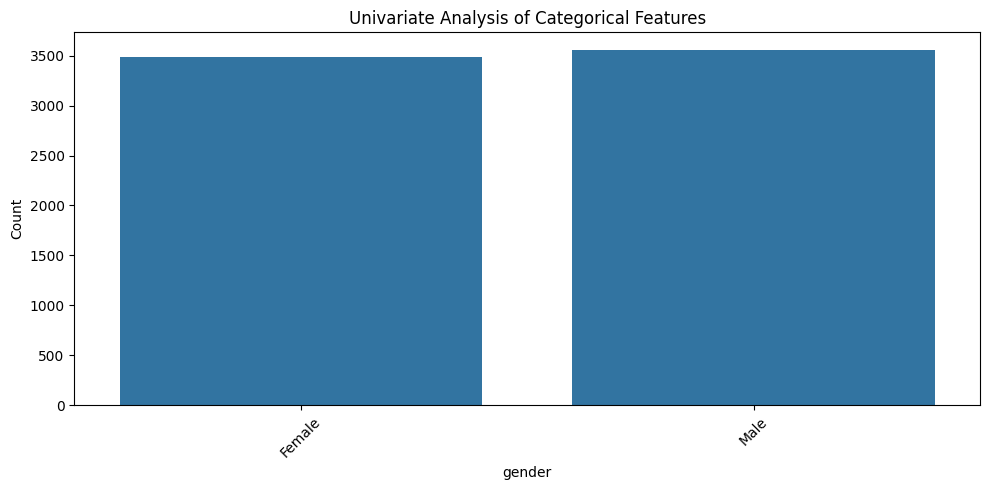

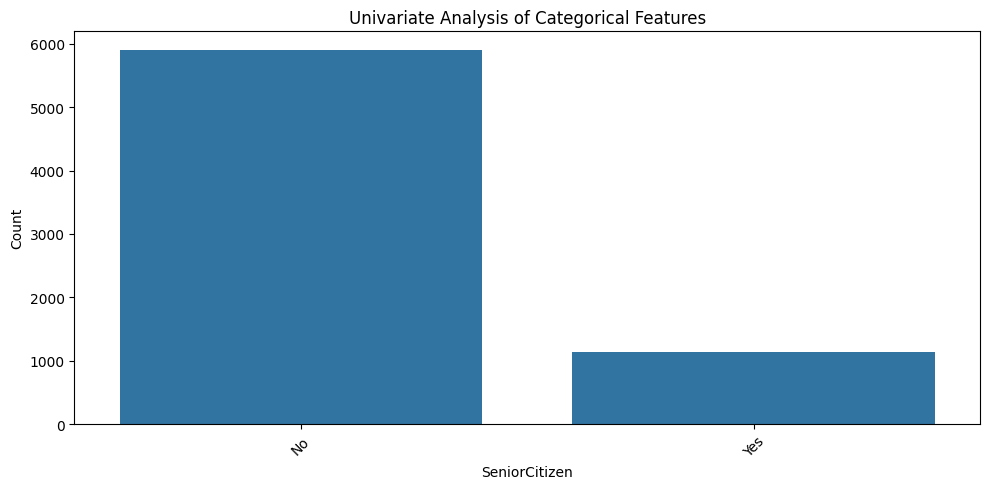

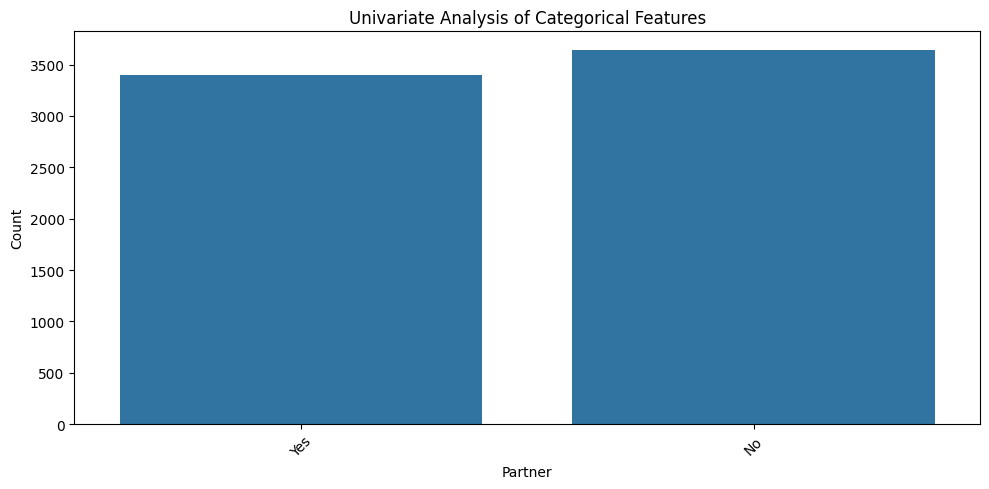

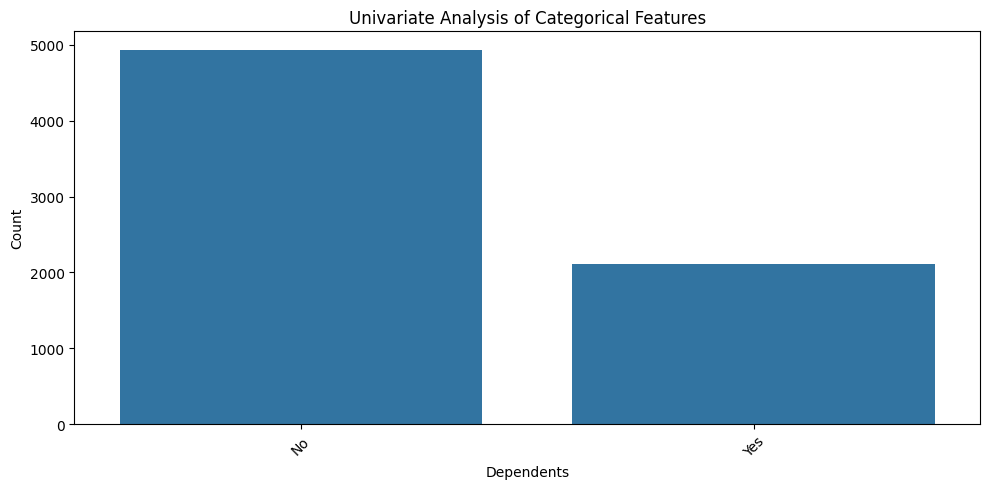

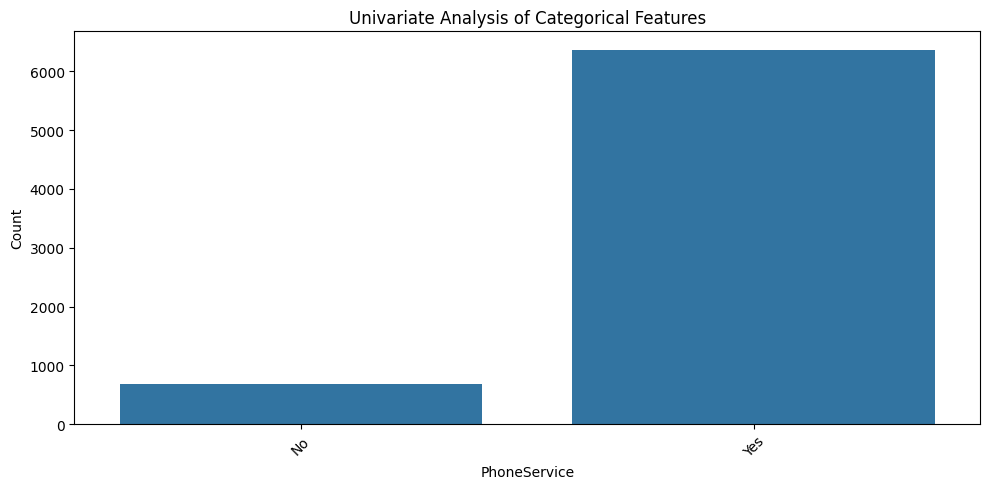

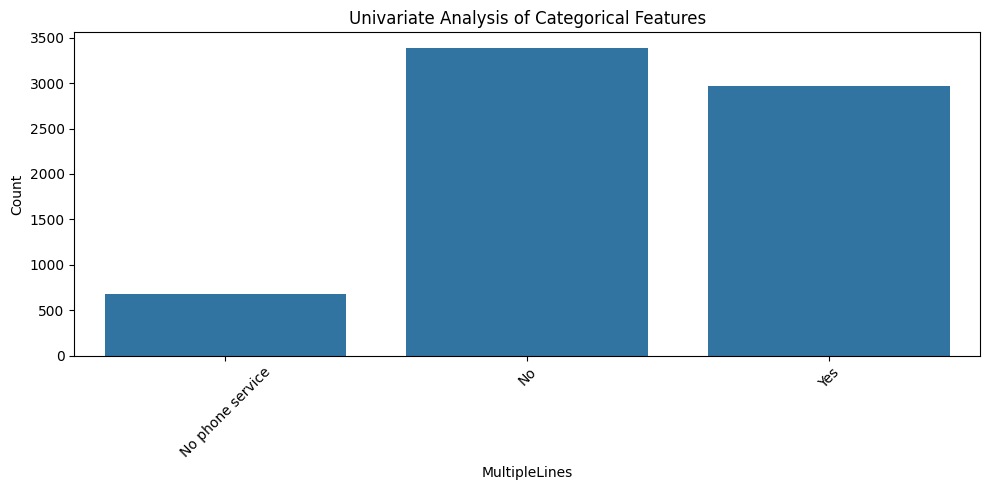

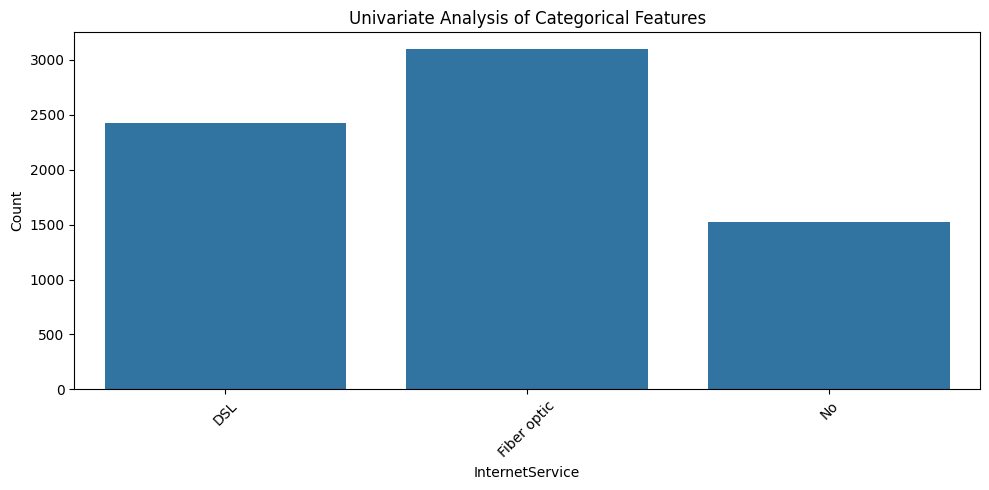

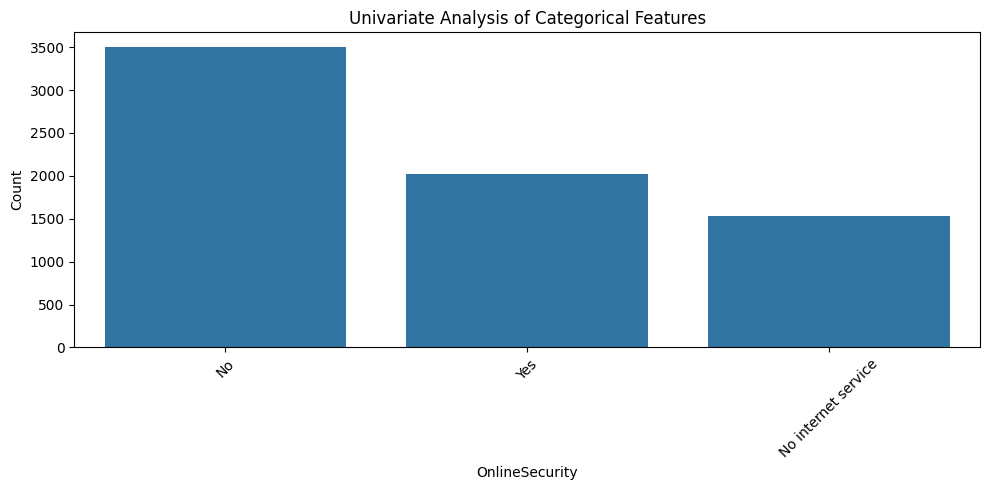

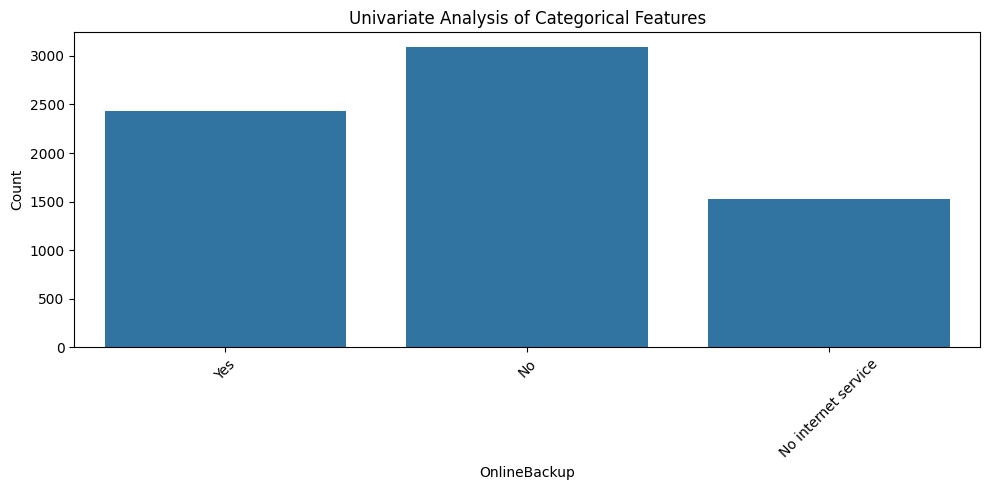

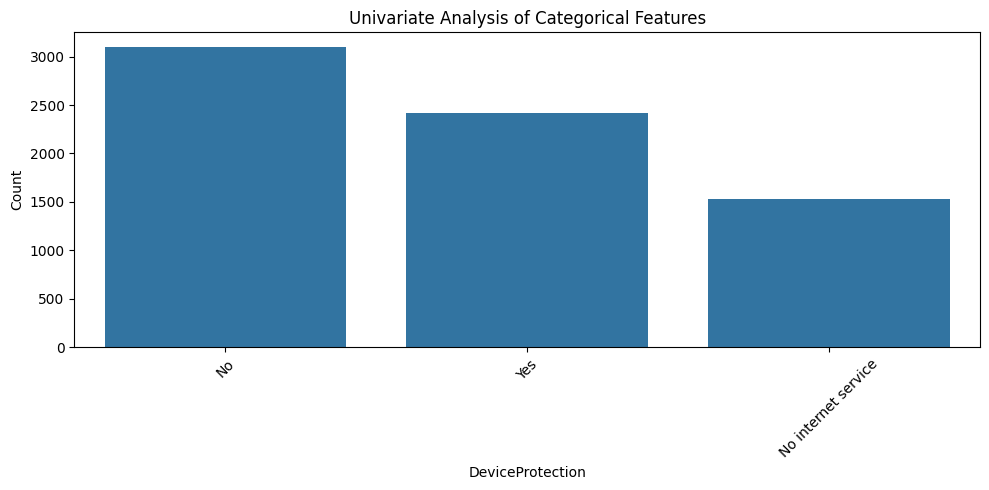

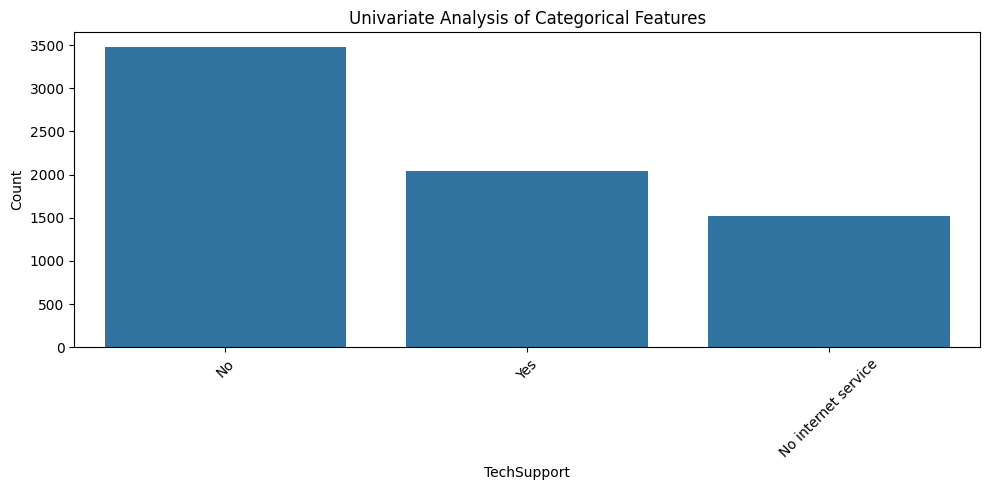

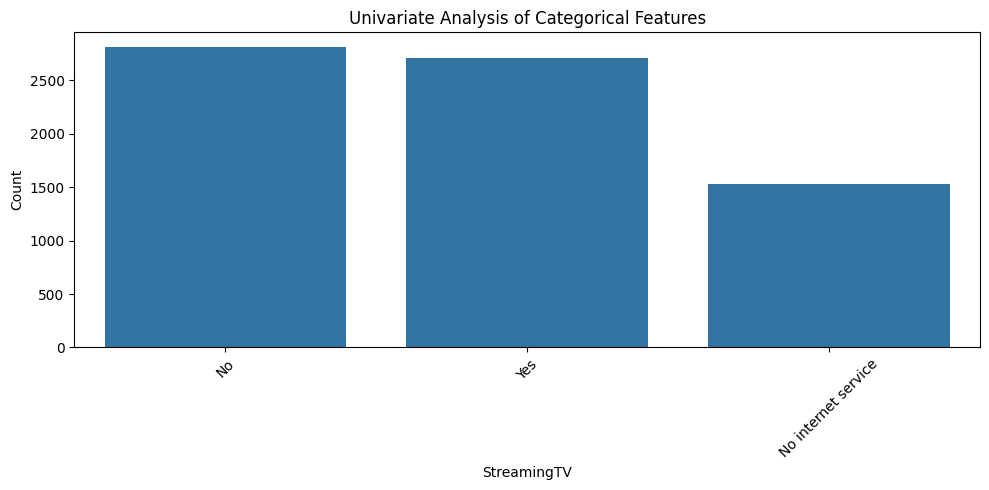

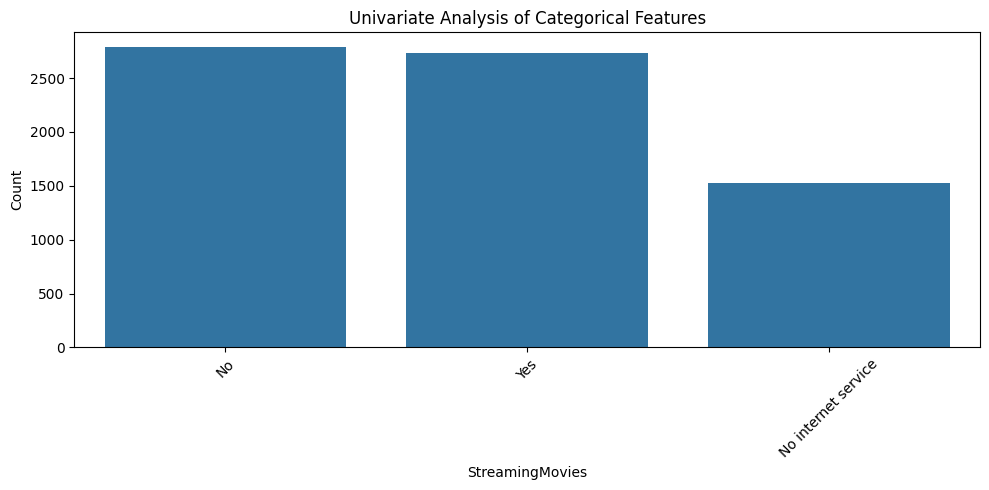

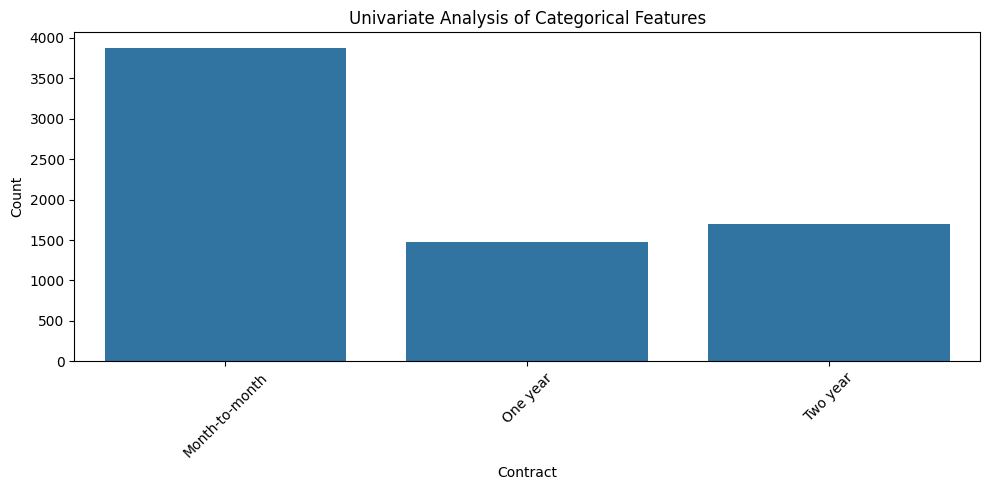

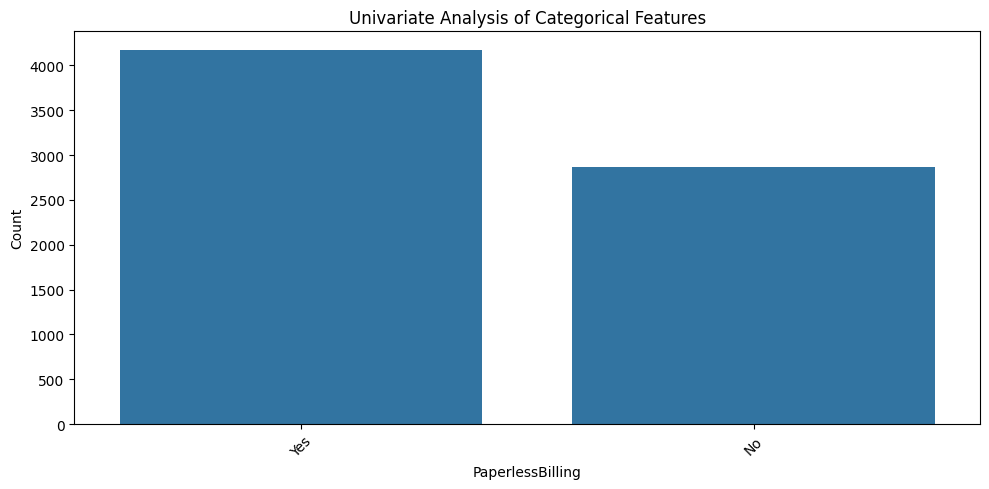

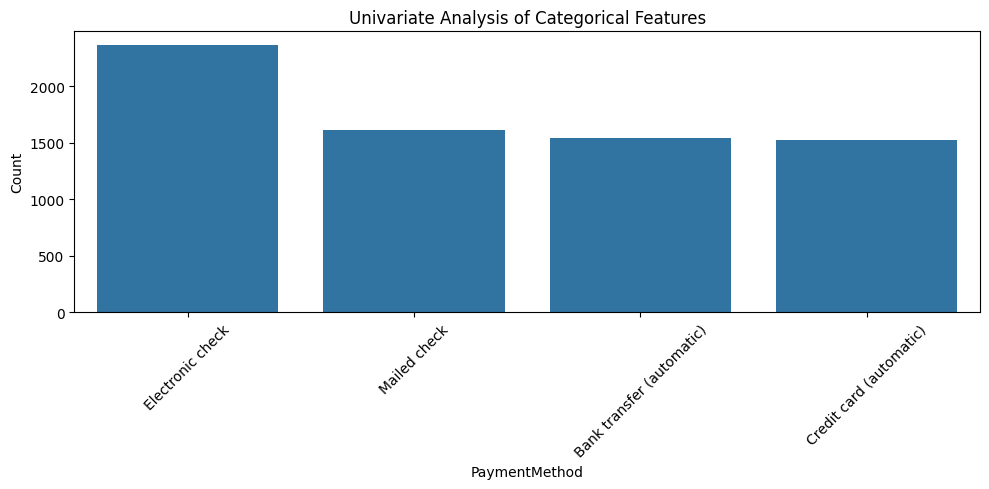

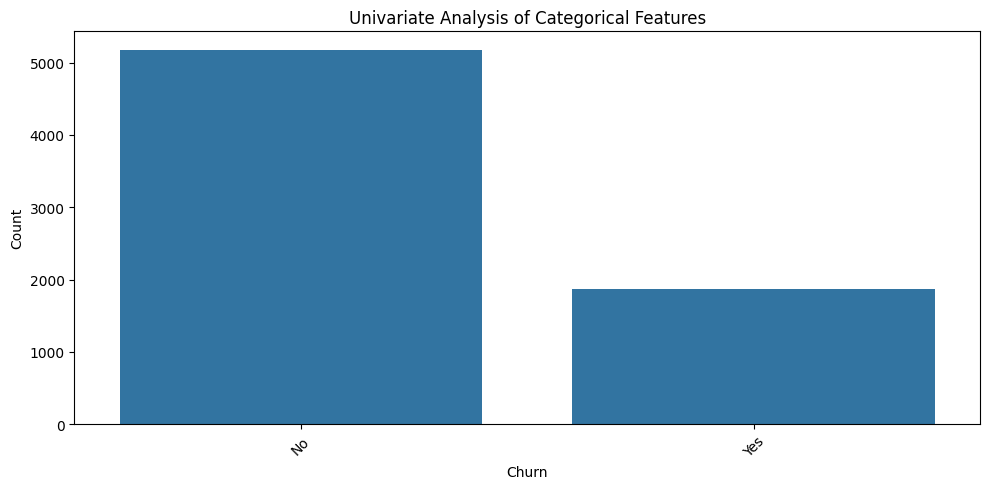

In [14]:
cat_features=[feature for feature in df.columns if df[feature].dtype=='object']
for feature in cat_features:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df,x=feature)
    plt.title("Univariate Analysis of Categorical Features")
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

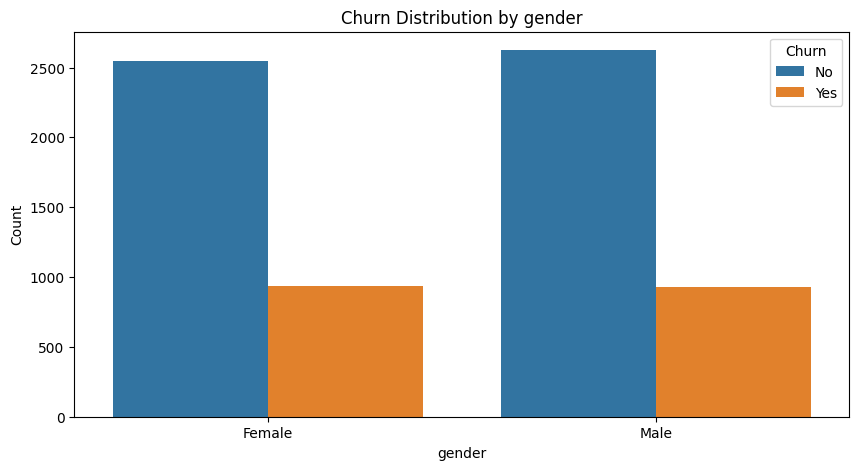

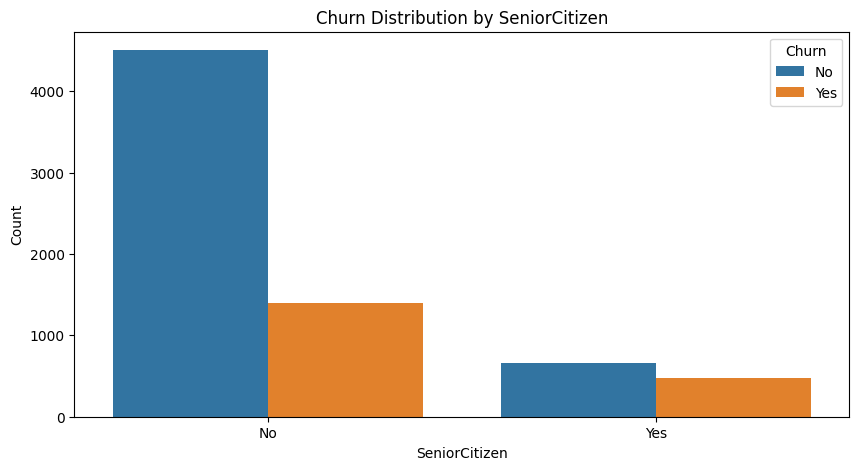

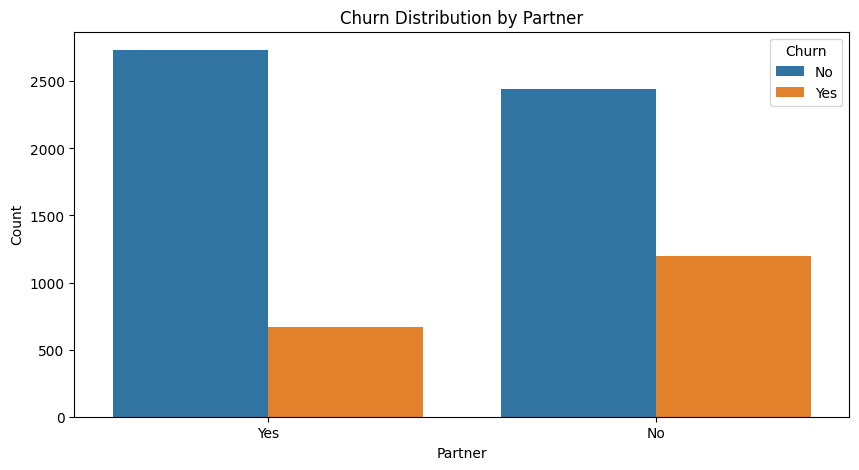

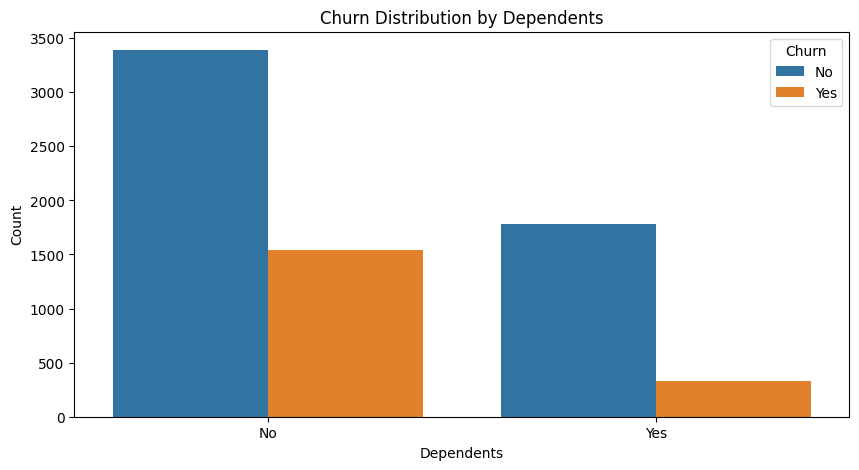

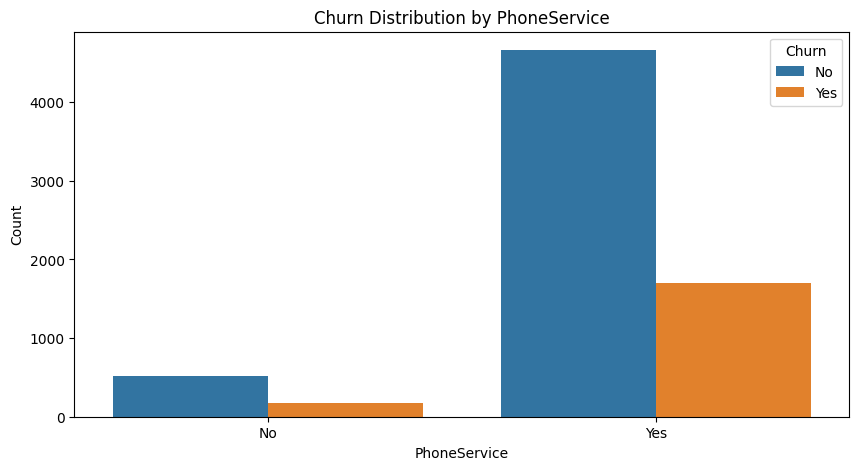

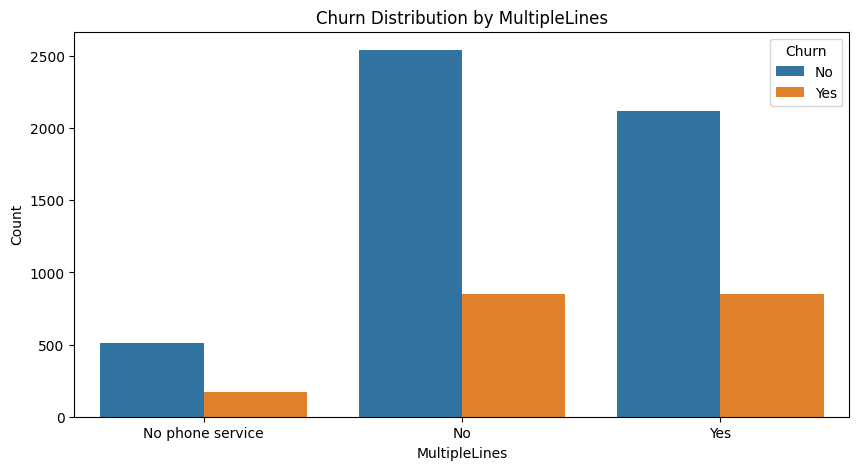

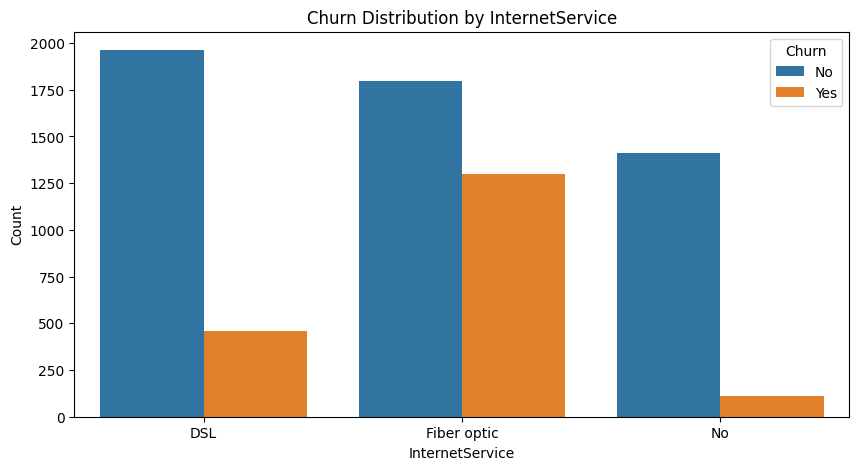

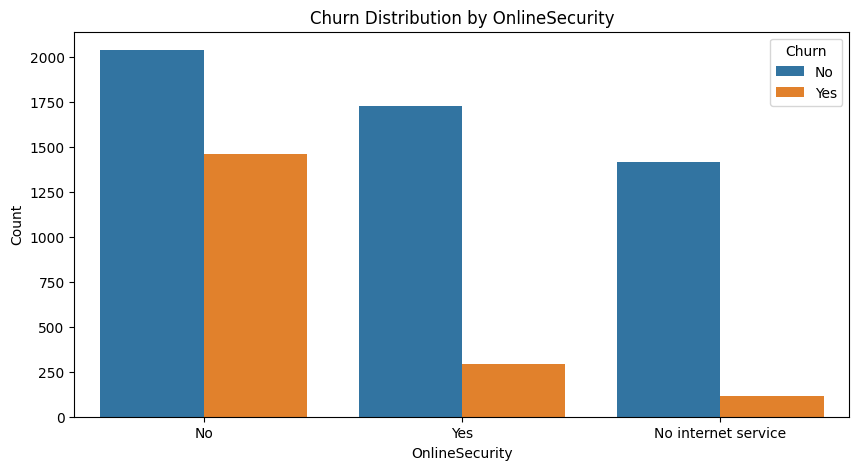

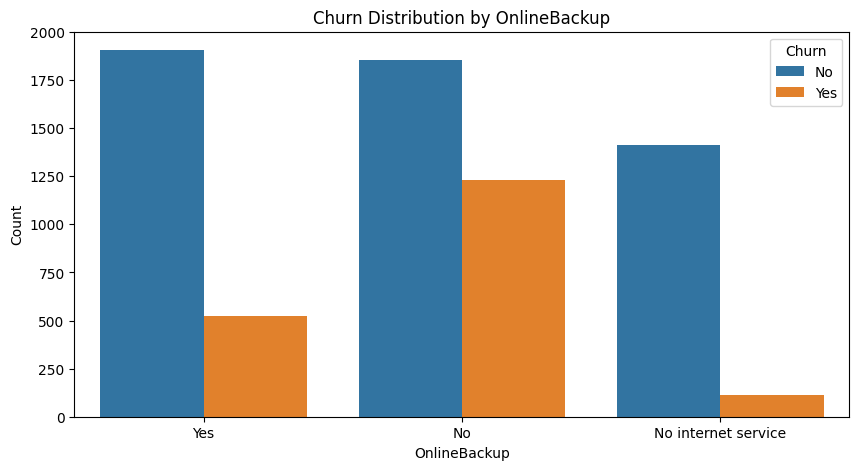

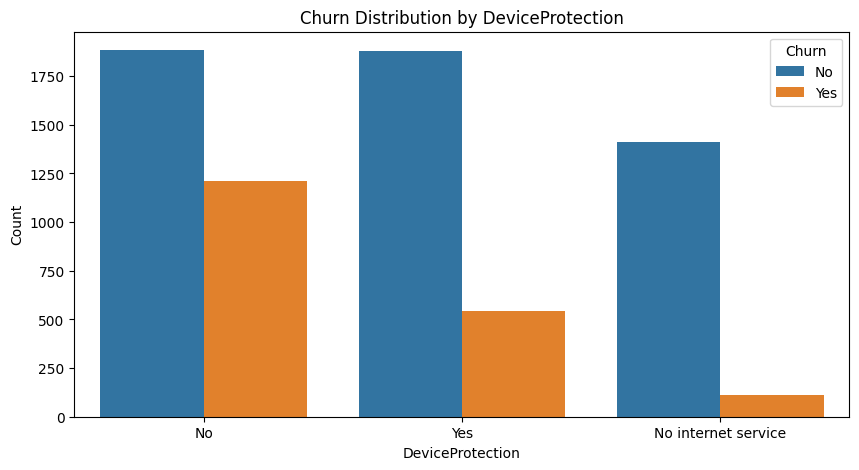

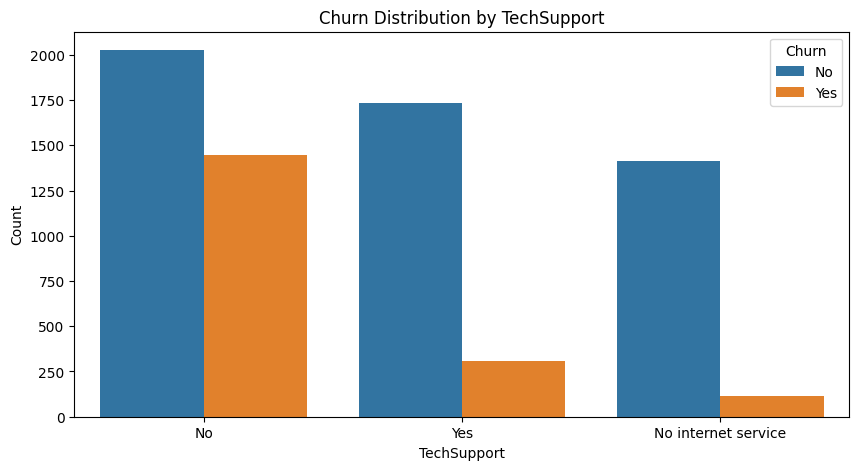

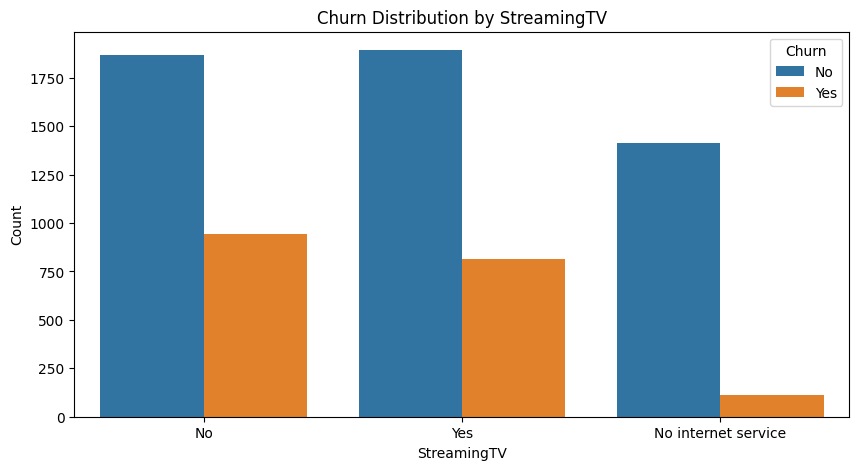

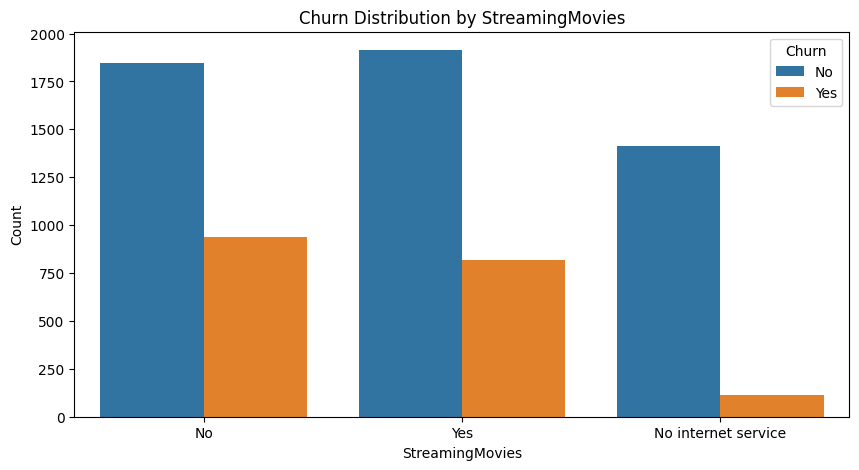

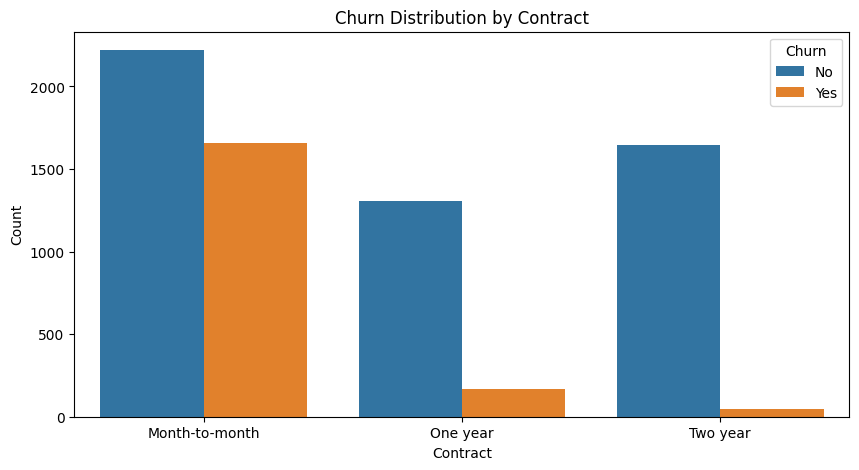

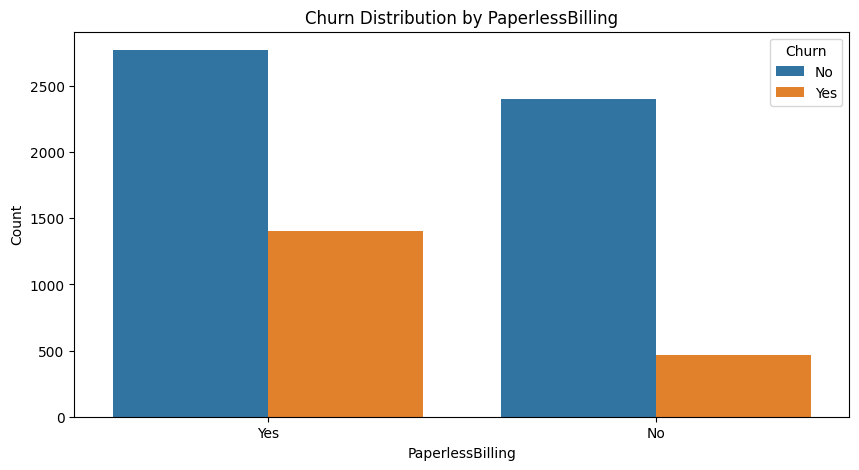

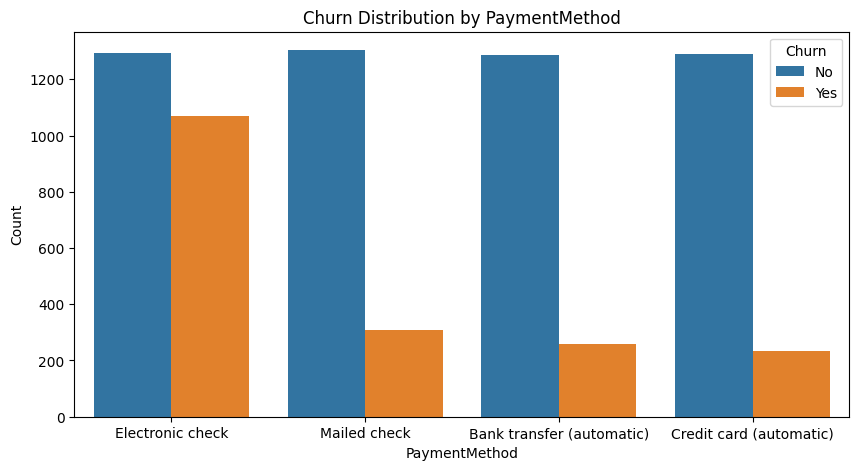

In [15]:
cat_features.remove('Churn')
for col in cat_features:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df,x=col,hue='Churn')
    plt.title(f"Churn Distribution by {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

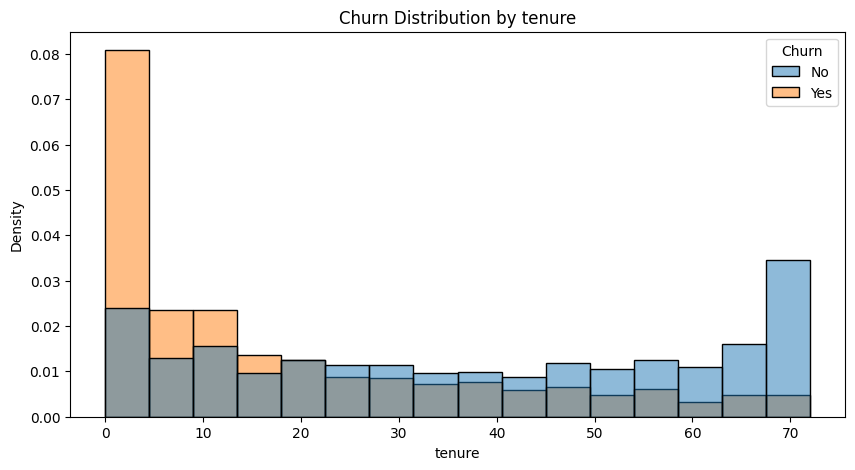

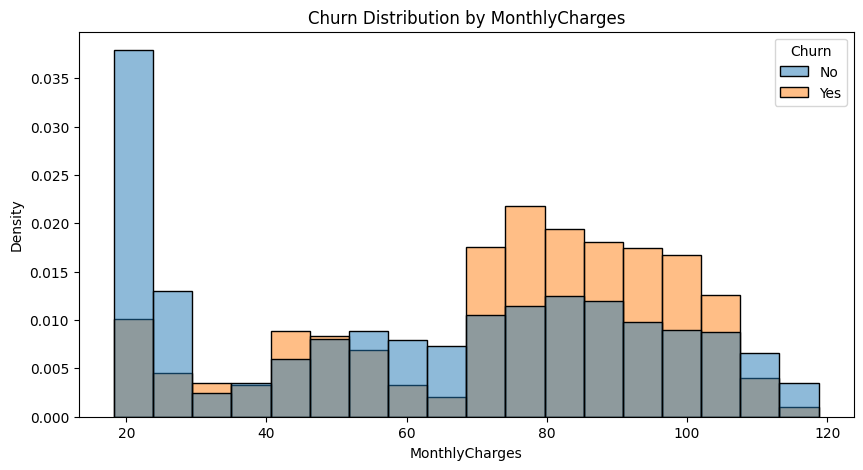

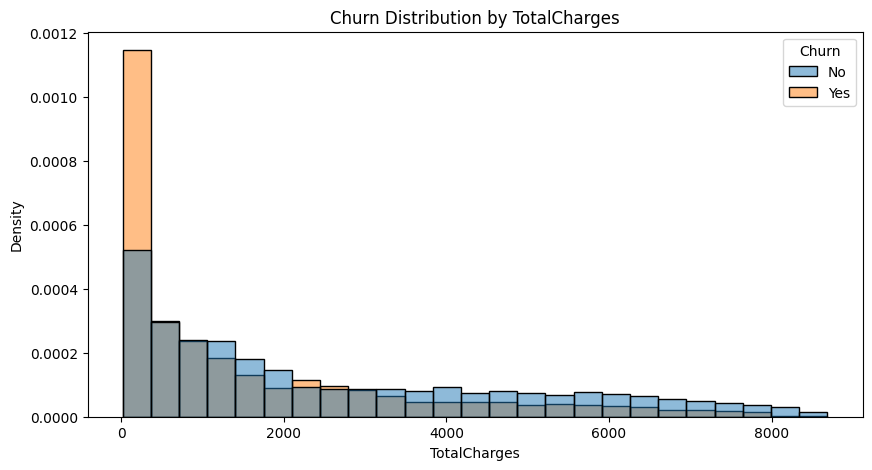

In [16]:
for col in num_features:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df,x=col,hue='Churn',stat='density',common_norm=False)
    plt.title(f"Churn Distribution by {col}")
    plt.xlabel(col)
    plt.show()

In [17]:
numeric_features=num_features.copy()


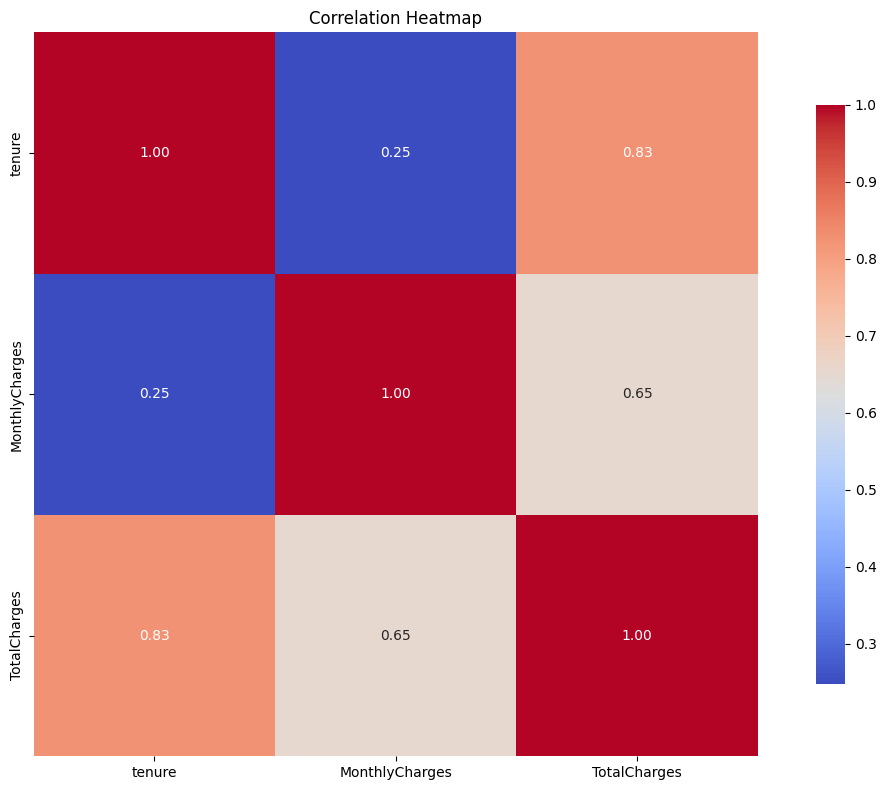

In [18]:
corr = df[numeric_features].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8}) 
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [19]:
df['Churn']=df['Churn'].map({'Yes':1,'No':0})

In [20]:
def tenure_group(tenure):
    if tenure <=12:
        return '0-1 year'
    if tenure <=24:
        return '1-2 years'
    if tenure <=36:
        return '2-3 years'
    if tenure <=48:
        return '3-4 years'
    if tenure <=60:
        return '4-5 years'
    else:
        return '5+years'
    

In [21]:
df['tenure_group']=df['tenure'].apply(tenure_group)

In [22]:
df.drop('tenure',axis=1,inplace=True)

In [23]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-1 year
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,2-3 years
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-1 year
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3-4 years
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-1 year


In [24]:
df['Dependents'].unique()
df['Dependents']=df['Dependents'].map({'Yes':1,'No':0})

In [25]:
df['PhoneService'].unique()
df['PhoneService']=df['PhoneService'].map({'Yes':1,'No':0})

In [26]:
df['MultipleLines'].unique()
df['MultipleLines']=df['MultipleLines'].map({'Yes':1,'No':0,'No phone service':2})

In [27]:
df['InternetService'].unique()
df['InternetService']=df['InternetService'].map({'DSL':2,'Fiber optic':1,'No':0})

In [28]:
df['OnlineSecurity'].unique()
df['OnlineSecurity']=df['OnlineSecurity'].map({'Yes':1,'No':0,'No internet service':2})

In [29]:
df['OnlineBackup'].unique()
df['OnlineBackup']=df['OnlineBackup'].map({'Yes':1,'No':0,'No internet service':2})

In [30]:
df['DeviceProtection'].unique()
df['DeviceProtection']=df['DeviceProtection'].map({'Yes':1,'No':0,'No internet service':2})

In [31]:
df['TechSupport'].unique()
df['TechSupport']=df['TechSupport'].map({'Yes':1,'No':0,'No internet service':2})

In [32]:
df['StreamingTV'].unique()
df['StreamingTV']=df['StreamingTV'].map({'Yes':1,'No':0,'No internet service':2})


In [33]:
df['StreamingMovies'].unique()
df['StreamingMovies']=df['StreamingMovies'].map({'Yes':1,'No':0,'No internet service':2})


In [34]:
df['PaperlessBilling'].unique()
df['PaperlessBilling']=df['PaperlessBilling'].map({'Yes':1,'No':0})

In [35]:
df['PaymentMethod'].unique()
df['PaymentMethod']=df['PaymentMethod'].map({'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3})

In [36]:
df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,No,Yes,0,0,2,2,0,1,0,0,0,0,Month-to-month,1,0,29.85,29.85,0,0-1 year
1,Male,No,No,0,1,0,2,1,0,1,0,0,0,One year,0,1,56.95,1889.50,0,2-3 years
2,Male,No,No,0,1,0,2,1,1,0,0,0,0,Month-to-month,1,1,53.85,108.15,1,0-1 year
3,Male,No,No,0,0,2,2,1,0,1,1,0,0,One year,0,2,42.30,1840.75,0,3-4 years
4,Female,No,No,0,1,0,1,0,0,0,0,0,0,Month-to-month,1,0,70.70,151.65,1,0-1 year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,1,1,1,2,1,0,1,1,1,1,One year,1,1,84.80,1990.50,0,1-2 years
7039,Female,No,Yes,1,1,1,1,0,1,1,0,1,1,One year,1,3,103.20,7362.90,0,5+years
7040,Female,No,Yes,1,0,2,2,1,0,0,0,0,0,Month-to-month,1,0,29.60,346.45,0,0-1 year
7041,Male,Yes,Yes,0,1,1,1,0,0,0,0,0,0,Month-to-month,1,1,74.40,306.60,1,0-1 year


In [37]:
if 'Contract' in df.columns:
    df['is_long_term_contract'] = df['Contract'].apply(lambda x: 1 if x in [1, 2] else 0)



if 'SeniorCitizen' in df.columns and 'Dependents' in df.columns:
    df['senior_with_dependents'] = ((df['SeniorCitizen'] == 1) & (df['Dependents'] == 1)).astype(int)


In [38]:
cols_to_drop = [
    'Contract',
    'SeniorCitizen',
    'Dependents',

]
cols_to_drop = [col for col in cols_to_drop if col in df.columns]
df.drop(columns=cols_to_drop, inplace=True)
print(f"Dropped columns: {cols_to_drop}")

Dropped columns: ['Contract', 'SeniorCitizen', 'Dependents']


In [39]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 16


In [40]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 3


In [41]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 14


In [42]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 2


In [43]:
continuous_features

['MonthlyCharges', 'TotalCharges']

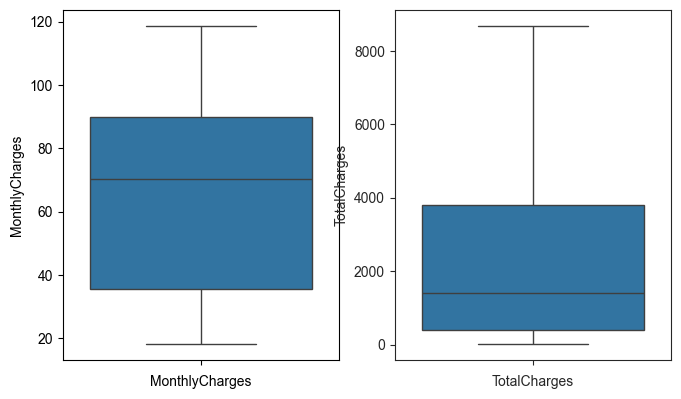

In [44]:
cont_features = continuous_features.copy()
plt.figure(figsize=(25, 10))

for i in range(len(cont_features)):
        plt.subplot(2,6,i+1)
        sns.set_style('ticks')
        plt.xlabel(cont_features[i])
        ax = sns.boxplot(df[cont_features[i]])

In [45]:
from sklearn.preprocessing import LabelEncoder
if 'tenure_group' in df.columns and df['tenure_group'].dtype == 'O':
    le = LabelEncoder()
    df['tenure_group'] = le.fit_transform(df['tenure_group'])
    print('Label encoded tenure_group:', dict(zip(le.classes_, le.transform(le.classes_))))

Label encoded tenure_group: {'0-1 year': 0, '1-2 years': 1, '2-3 years': 2, '3-4 years': 3, '4-5 years': 4, '5+years': 5}


In [46]:
df['gender']=df['gender'].map({'Male':1,'Female':0})
df['Partner']=df['Partner'].map({'Yes':1,'No':0})

In [47]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
df[continuous_features]=minmax.fit_transform(df[continuous_features])

In [48]:
df

,gender,Partner,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,is_long_term_contract,senior_with_dependents
0,0,1,0,2,2,0,1,0,0,0,0,1,0,0.115423,0.001275,0,0,0,0
1,1,0,1,0,2,1,0,1,0,0,0,0,1,0.385075,0.215867,0,2,0,0
2,1,0,1,0,2,1,1,0,0,0,0,1,1,0.354229,0.010310,1,0,0,0
3,1,0,0,2,2,1,0,1,1,0,0,0,2,0.239303,0.210241,0,3,0,0
4,0,0,1,0,1,0,0,0,0,0,0,1,0,0.521891,0.015330,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,2,1,0,1,1,1,1,1,1,0.662189,0.227521,0,1,0,0
7039,0,1,1,1,1,0,1,1,0,1,1,1,3,0.845274,0.847461,0,5,0,0
7040,0,1,0,2,2,1,0,0,0,0,0,1,0,0.112935,0.037809,0,0,0,0
7041,1,1,1,1,1,0,0,0,0,0,0,1,1,0.558706,0.033210,1,0,0,0


In [49]:
import joblib

joblib.dump(minmax, '../models/minmax_scaler.pkl')
joblib.dump(le,'../models/labelencoder.pkl')

['../models/labelencoder.pkl']

In [50]:
import os
os.makedirs('data', exist_ok=True)
df.to_csv('data/final_df.csv', index=False)

In [51]:
df

,gender,Partner,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,is_long_term_contract,senior_with_dependents
0,0,1,0,2,2,0,1,0,0,0,0,1,0,0.115423,0.001275,0,0,0,0
1,1,0,1,0,2,1,0,1,0,0,0,0,1,0.385075,0.215867,0,2,0,0
2,1,0,1,0,2,1,1,0,0,0,0,1,1,0.354229,0.010310,1,0,0,0
3,1,0,0,2,2,1,0,1,1,0,0,0,2,0.239303,0.210241,0,3,0,0
4,0,0,1,0,1,0,0,0,0,0,0,1,0,0.521891,0.015330,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,2,1,0,1,1,1,1,1,1,0.662189,0.227521,0,1,0,0
7039,0,1,1,1,1,0,1,1,0,1,1,1,3,0.845274,0.847461,0,5,0,0
7040,0,1,0,2,2,1,0,0,0,0,0,1,0,0.112935,0.037809,0,0,0,0
7041,1,1,1,1,1,0,0,0,0,0,0,1,1,0.558706,0.033210,1,0,0,0
